In [20]:
import pandas as pd
import numpy as np
import os, pdb, sys, pickle
import matplotlib.pyplot as plt

with open('results_2.pkl', 'rb') as f: 
    dct = pickle.load(f)
print(dct.keys())
print(dct['chg_var'].keys())
dct['chg_var']['0.001-30'].head()

dict_keys(['chg_var', 'cov_shift', 'mix_shift'])
dict_keys(['0.0001-30', '0.001-30', '0.01-30', '0.1-30', '0.6-30', '1-30', '5-30', '10-30', '20-30', '30-30'])


,x1,x2,x3,y,time,pe
0,0.496714,1.399355,-0.675178,1.220891,0,0.0
1,-0.138264,0.924634,-0.144519,0.641851,1,0.0
2,0.647689,0.059630,-0.792420,-0.085101,2,0.0
3,1.523030,-0.646937,-0.307962,0.568132,3,0.0
4,-0.234153,0.698223,-1.893615,-1.429545,4,0.0


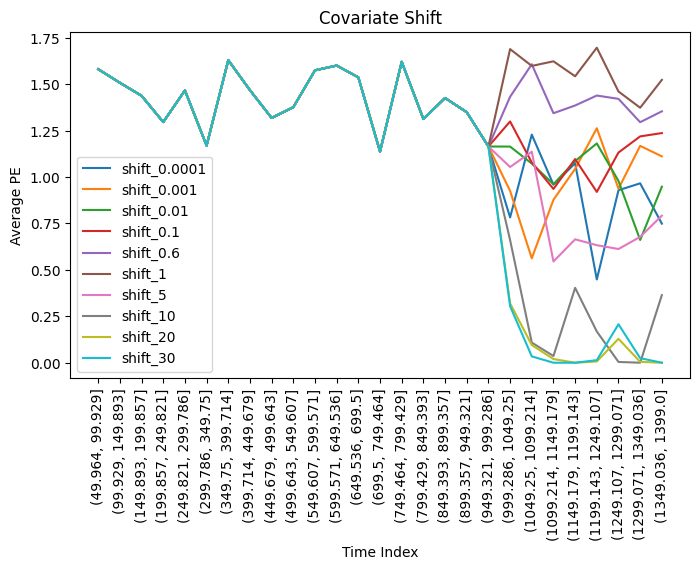

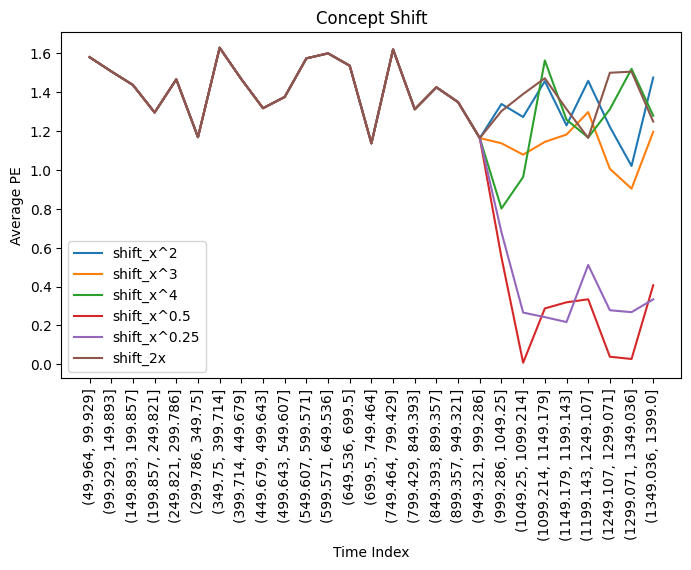

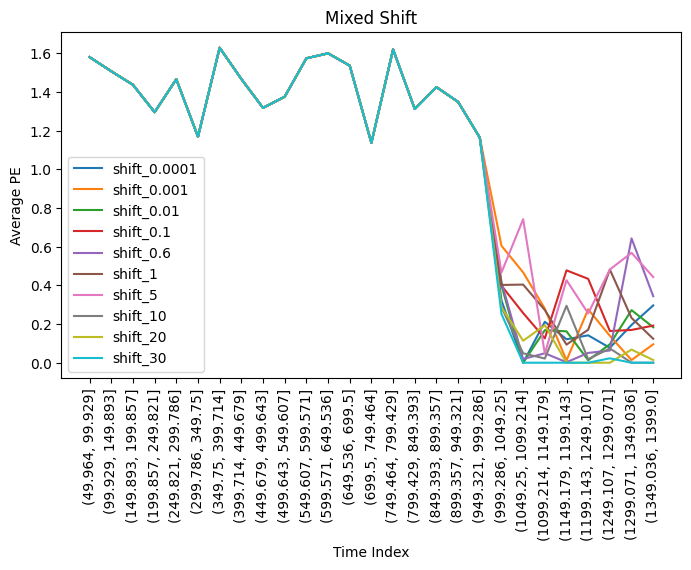

In [28]:
for typeOfShift in dct.keys(): 
    res = dct[typeOfShift]
    df = None
    for k in res.keys(): 
        if df is None: 
            df = res[k][['time', 'pe']]
            df.columns = ['time', 'shift_' + str(k).split('-')[0]]
        else: 
            tmp = res[k][['time', 'pe']]
            tmp.columns = ['time', 'shift_' + str(k).split('-')[0]]
            df = pd.merge(df, tmp, how = 'left', on = 'time')

    # Group Into Bins for Visualization
    df['time_bin'] = pd.qcut(df['time'], q = 28)
    df = df.groupby(['time_bin']).mean().reset_index()
    df = df.iloc[1:].reset_index(drop = True) # Remove first bin since no PE value. 

    # Plot
    plt.figure(figsize=(8,4.5))
    for col in df.columns[2:]: 
        plt.plot(df.index, df[col], label = col)
    plt.ylabel('Average PE') 
    plt.xlabel('Time Index')
    plt.xticks(df.index, df['time_bin'], rotation = 90)

    names = {'chg_var': 'Covariate Shift', 'cov_shift': 'Concept Shift', 'mix_shift': 'Mixed Shift'}
    name = names[typeOfShift]

    plt.title(name) 
    plt.legend()
    plt.show()
    plt.close()


    

# Comparison of Means

In [22]:
chg_var = dct['chg_var']
from scipy.stats import ttest_ind
results = {} 
# Question: at what point does the mean PE become statistically different? 
for key in chg_var.keys(): 
    minIdx, minTime = [], []
    df = chg_var[key]
    df = df.iloc[30:].reset_index(drop = True)
    a1, a2 = 0,100
    b1, b2 = 101, 131
    while b2 < len(df): 
        dfa = df.iloc[a1:a2+1]
        dfb = df.iloc[b1:b2+1]
        
        # Test
        t_stat, p_val = ttest_ind(dfa['pe'], dfb['pe'])
        if p_val < 0.05: 
            minIdx.append(b2+1)
            minTime.append(max(dfb['time']))
        results[key] = [minIdx[0], minTime[0]]

        # Iterate
        a1 +=1 
        b1 +=1 
        a2 += 1
        b2 += 1
    
chg_var.keys()

dict_keys(['0.0001-30', '0.001-30', '0.01-30', '0.1-30', '0.6-30', '1-30', '5-30', '10-30', '20-30', '30-30'])

In [23]:
# Summary Stats for Covariate Shift
v = dct['chg_var']
for key in ['0.0001-30', '0.01-30', '1-30', '10-30', '30-30']: 
    sub = v[key][['x1', 'y']]
    print(key)
    print('min x1: ' + str(min(sub['x1'])))
    print('max x1: ' + str(max(sub['x1'])))
    print('mean x1: ' + str(np.mean(sub['x1'])))
    print('var x1: ' + str(np.var(sub['x1'])))

    print('min y: ' + str(min(sub['y'])))
    print('max y: ' + str(max(sub['y'])))
    print('mean y: ' + str(np.mean(sub['y'])))
    print('var y: ' + str(np.var(sub['y'])))
    print('-------')

0.0001-30
min x1: -3.2412673400690726
max x1: 3.852731490654721
mean x1: 0.01380796450268491
var x1: 0.6842941418583468
min y: -4.585545342037927
max y: 5.6015996392650145
mean y: 0.05025377999382181
var y: 2.646357066166704
-------
0.01-30
min x1: -3.2412673400690726
max x1: 3.852731490654721
mean x1: 0.013673035518048113
var x1: 0.6843253484435208
min y: -4.585545342037927
max y: 5.6015996392650145
mean y: 0.048724342485946044
var y: 2.6558256282599704
-------
1-30
min x1: -3.2412673400690726
max x1: 3.852731490654721
mean x1: 0.013159619949045404
var x1: 0.9488182323638447
min y: -4.619758673715671
max y: 5.6015996392650145
mean y: 0.05432014580146956
var y: 2.786747938704505
-------
10-30
min x1: -33.21114555589139
max x1: 32.87761187388739
mean x1: 0.06783855120202455
var x1: 32.36668797003767
min y: -32.888636828625685
max y: 31.19787622285597
mean y: 0.11545662129193074
var y: 33.4219664086837
-------
30-30
min x1: -88.61470456201873
max x1: 98.57171141045526
mean x1: 0.34557070

In [24]:
# Summary Stats for Concept Shift
v = dct['cov_shift']
for key in ['x^2-30', 'x^4-30', 'x^0.5-30', 'x^0.25-30']: 
    sub = v[key][['x1', 'y']]
    print(key)
    print('min x1: ' + str(min(sub['x1'])))
    print('max x1: ' + str(max(sub['x1'])))
    print('mean x1: ' + str(np.mean(sub['x1'])))
    print('var x1: ' + str(np.var(sub['x1'])))

    print('min y: ' + str(min(sub['y'])))
    print('max y: ' + str(max(sub['y'])))
    print('mean y: ' + str(np.mean(sub['y'])))
    print('var y: ' + str(np.var(sub['y'])))
    print('-------')

x^2-30
min x1: -3.635200227540102
max x1: 3.852731490654721
mean x1: -0.0012821176900351817
var x1: 0.9784600517294949
min y: -4.585545342037927
max y: 11.634162533720545
mean y: 0.3772231276358122
var y: 3.4660228473799006
-------
x^4-30
min x1: -3.2412673400690726
max x1: 3.852731490654721
mean x1: 0.02724294927443234
var x1: 0.9881933611162349
min y: -4.585545342037927
max y: 90.88255398946367
mean y: 0.9900387987460166
var y: 27.182243995556465
-------
x^0.5-30
min x1: -3.2412673400690726
max x1: 3.9423310108066856
mean x1: -0.002655154079930429
var x1: 0.9627711702289529
min y: -4.585545342037927
max y: 5.6015996392650145
mean y: 0.20939337265109798
var y: 2.8437245002626765
-------
x^0.25-30
min x1: -3.3348927106258297
max x1: 3.852731490654721
mean x1: 0.008832868344354563
var x1: 1.002121695306096
min y: -4.585545342037927
max y: 5.6015996392650145
mean y: 0.2309568082800193
var y: 2.802318369056688
-------


In [25]:
# Summary Stats for Concept Shift
v = dct['mix_shift']
for key in ['30-30']: 
    sub = v[key][['x1', 'y']]
    print(key)
    print('min x1: ' + str(min(sub['x1'])))
    print('max x1: ' + str(max(sub['x1'])))
    print('mean x1: ' + str(np.mean(sub['x1'])))
    print('var x1: ' + str(np.var(sub['x1'])))

    print('min y: ' + str(min(sub['y'])))
    print('max y: ' + str(max(sub['y'])))
    print('mean y: ' + str(np.mean(sub['y'])))
    print('var y: ' + str(np.var(sub['y'])))
    print('-------')

30-30
min x1: -68.14841351935985
max x1: 111.83500034289563
mean x1: 0.8671397200150016
var x1: 263.6965614407404
min y: -4.585545342037927
max y: 11.237857832444316
mean y: 0.8877946829301365
var y: 6.441654642433642
-------
